- Look the alpha and beta values of the synth songs to see the values and the range to have an idea of the range of those parameters

- Create artificialy a simple beta and listen the sound produced. What is the impact of beta in the song production?

In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.io import wavfile
from IPython.display import Audio

sys.path.append('../model/')
from measures import normalize_and_center
from song_model import SongModel
import synth

(18402, 2)
[[0.00035873 0.15      ]
 [0.00122509 0.15      ]
 [0.00171329 0.15      ]
 ...
 [0.11854    0.15      ]
 [0.120276   0.15      ]
 [0.121145   0.15      ]]


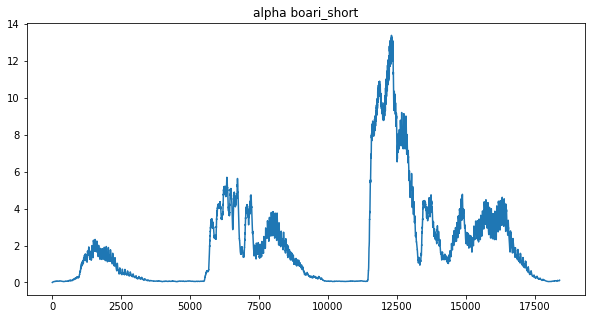

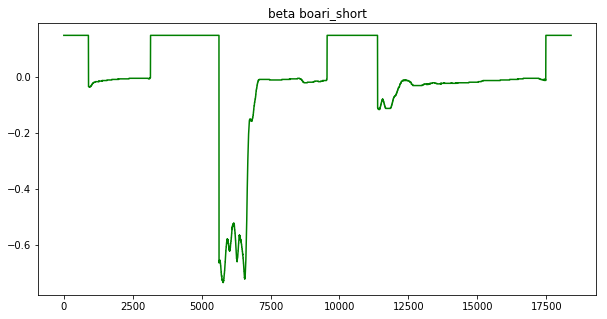

In [2]:
# l_name = ["ba_example",
#           "bells",
#           "boari_short",
#           "flashcam",
#           "samba",
#           "simple"]

l_name = ["boari_short"]

for name in l_name:
    s_ab = np.loadtxt("../data/{}_ab.dat".format(name))
    sr, song = wavfile.read("../data/{}.wav".format(name))
    song = normalize_and_center(song)
#     print(s_ab.shape)
#     print(s_ab)
    
    plt.figure(figsize=(10, 5))
    plt.plot(s_ab[:,0])
    plt.title("alpha {}".format(name))
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(s_ab[:,1],color='g')
    plt.title("beta {}".format(name))
    plt.show()
    
    

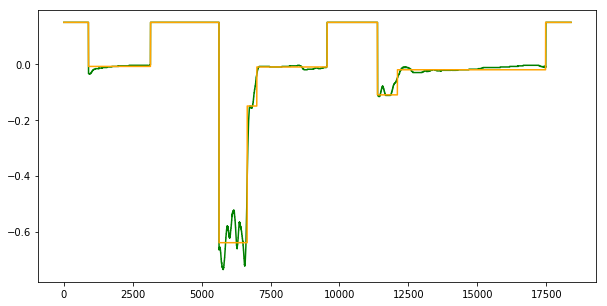

In [3]:
beta = 0.15 * np.ones(s_ab.shape[0])
beta[893:3143] = -0.008
beta[5629:6650] = -0.64
beta[6650:7000] = -0.15
beta[7000:9550] = -0.01
beta[11375: 12100] = -0.11
beta[12100: 17475] = -0.02

plt.figure(figsize=(10, 5))
plt.plot(s_ab[:,1],color="g")
plt.plot(beta,color='orange')
plt.show()

(18402, 2)
[0.121145 0.15    ]
(18404, 2)
18402


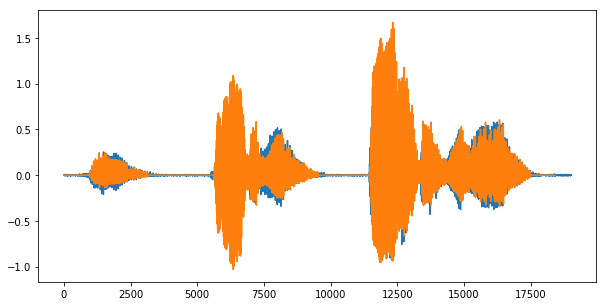

In [4]:
alpha = np.copy(s_ab[:,0])

artif_ab = np.array([alpha, beta])
artif_ab = artif_ab.T

print(artif_ab.shape)

test = artif_ab[-1]
print(test)
pad = np.array([artif_ab[-1], artif_ab[-1]])

artif_ab = np.concatenate((artif_ab, pad))
print(artif_ab.shape)


artif_ab = artif_ab.copy(order='C')

artif_song = synth.synthesize(artif_ab, True)
print(len(artif_song))

plt.figure(figsize=(10, 5))
plt.plot(song)
plt.plot(artif_song)
plt.show()

display(Audio(song, rate=sr))
display(Audio(artif_song, rate=sr))